In [98]:
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import numpy as np

# DenseNet

In [99]:
image_dir = '/home/huypham/Projects/ecg/tmp/logs_cinc2017/densenet121/GradCAM'

with open('/home/huypham/Projects/ecg/tmp/logs_cinc2017/densenet121/predictions.json') as f:
    data = json.load(f)

preds = []
for k, v in data.items():
    v.update({'filename': k})
    preds.append(v)

In [100]:
df = pd.DataFrame(preds).sort_values(by='prob', ascending=False)

In [101]:
df = df[
    (df.label == df.pred) & (df.prob > 0.8)
]

In [102]:
samples_n = df[df.label == 'N']
samples_a = df[df.label == 'A']
# samples_n = df[df.label == 'N']

In [103]:
samples_n[-5:]

,label,pred,prob,filename
1129,N,N,0.805200,batch-017-041.png
377,N,N,0.803664,batch-005-057.png
1463,N,N,0.802778,batch-022-055.png
627,N,N,0.800946,batch-009-051.png
1259,N,N,0.800157,batch-019-043.png


In [104]:
samples_a

,label,pred,prob,filename
65,A,A,0.981176,batch-001-001.png
309,A,A,0.923791,batch-004-053.png
83,A,A,0.912897,batch-001-019.png
64,A,A,0.839942,batch-001-000.png


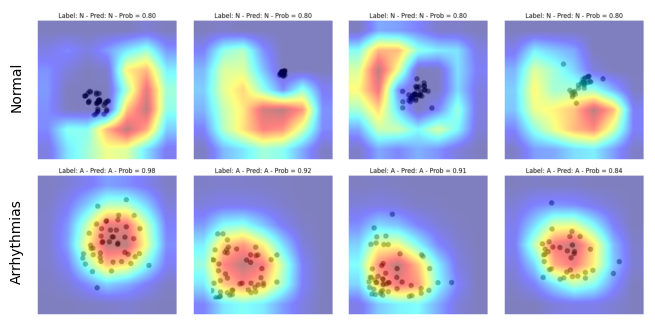

In [105]:
fig, axs = plt.subplots(2, 4, figsize=(8, 4))

# Show Normal
for ax, fp in zip(axs[0], samples_n[-4:].filename):
    img = plt.imread(os.path.join(image_dir, fp))
    ax.imshow(img)
    # ax.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)

axs[0][0].set_ylabel('Normal')

# Show Arrhythmias
for ax, fp in zip(axs[1], samples_a[-4:].filename):
    img = plt.imread(os.path.join(image_dir, fp))
    ax.imshow(img)
    # ax.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

axs[1][0].set_ylabel('Arrhythmias')

plt.subplots_adjust(
    # left=0.1,
    # bottom=0.1,
    # right=0.9,
    # top=0.9,
    wspace=0.01,
    hspace=0.01
)

plt.savefig('./explain_densenet121.pdf', dpi=100, bbox_inches='tight')

# ResNet 1d

In [106]:
image_dir = '/home/huypham/Projects/ecg/tmp/logs_cinc2017/resnet1d/GradCAM'

with open('/home/huypham/Projects/ecg/tmp/logs_cinc2017/resnet1d/predictions.json') as f:
    data = json.load(f)

In [107]:
df = pd.DataFrame(data).sort_values(by='prob', ascending=False)

In [108]:
df = df[
    (df.label == df.pred) & (df.prob > 0.9)
]

In [109]:
samples_n = df[df.label == 'N']
samples_a = df[df.label == 'A']
# samples_n = df[df.label == 'N']

In [110]:
samples_n[-5:]

,filename,label,pred,prob
453,batch-019-021--N.png,N,N,0.902578
502,batch-021-023--N.png,N,N,0.901718
272,batch-011-029--N.png,N,N,0.901082
849,batch-036-016--N.png,N,N,0.900801
674,batch-028-025--N.png,N,N,0.900511


In [111]:
samples_a[-5:]

,filename,label,pred,prob
727,batch-031-005--A.png,A,A,0.927564
900,batch-038-023--A.png,A,A,0.921057
351,batch-015-008--A.png,A,A,0.916011
918,batch-039-014--A.png,A,A,0.915838
746,batch-032-003--A.png,A,A,0.910553


In [112]:
samples_n = [
    "batch-000-017--N.png",
    "batch-001-014--N.png"
]

samples_a = [
    "batch-001-013--A.png",
    "batch-008-022--A.png"
]

In [113]:
# files = samples_n[:2].filename.to_list() + samples_a[:2].filename.to_list()
files = samples_n + samples_a

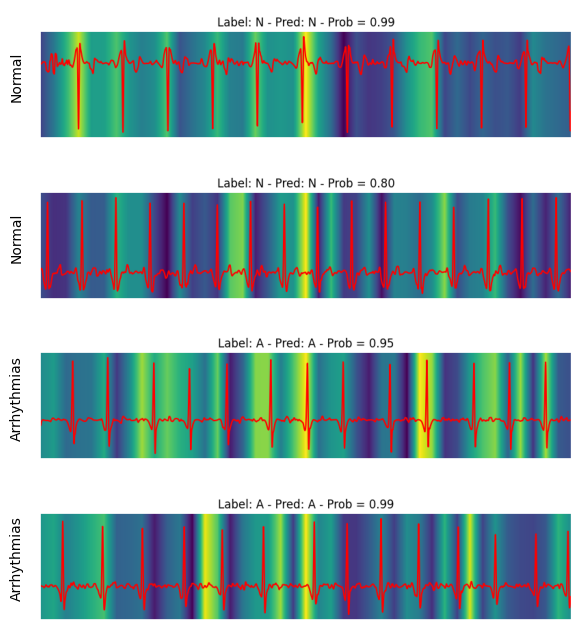

In [114]:
fig, axs = plt.subplots(len(files), 1, figsize=(10, 8))

for idx, fp in enumerate(files):
    ax = axs[idx]

    if fp.replace('.png', '').endswith('N'):
        title = 'Normal'
        
    else:
        title = 'Arrhythmias'
    
    fpath = os.path.join(image_dir, fp)

    img = plt.imread(fpath)
    ax.imshow(img)
    ax.set_ylabel(title)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
plt.savefig('explain_resnet1d.pdf', dpi=100, bbox_inches='tight')

In [115]:
# fig, axs = plt.subplots(len(files), 1, figsize=(10, 8))

# for idx, fp in enumerate(files):
#     ax = axs[idx]

#     if fp.replace('.png', '').endswith('N'):
#         title = 'Normal'
        
#     else:
#         title = 'Arrhythmias'
    
#     fpath = os.path.join(image_dir, 'adaptivemaxpool', fp)

#     img = plt.imread(fpath)
#     ax.imshow(img)
#     ax.set_ylabel(title)

#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
#     ax.set_xticks([])
#     ax.set_yticks([])
#     for spine in ax.spines.values():
#         spine.set_visible(False)

# XGBoost

In [116]:
import joblib 
search = joblib.load('/home/huypham/Projects/ecg/logs_cinc2017/tabular/search.pkl')
best = search.best_estimator_

In [117]:
df = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2017/processed/test_features.csv')
feature_names = np.array([i for i in df.columns if i.startswith('x__')])

In [118]:
len(feature_names)

714

In [119]:
feature_names = feature_names[best[0][-2].get_support()]
print(len(feature_names))

672


In [120]:
feature_names = feature_names[best[0][-1].get_support()]
print(len(feature_names))

82


In [121]:
fi = pd.DataFrame(dict(feature=feature_names, fi=best[-1].feature_importances_))

In [122]:
print(fi.sort_values(by='fi', ascending=False).head(15).to_markdown(index=False))

| feature                                                     |        fi |
|:------------------------------------------------------------|----------:|
| x__ratio_beyond_r_sigma__r_5                                | 0.034103  |
| x__ratio_beyond_r_sigma__r_2.5                              | 0.0336488 |
| x__ratio_beyond_r_sigma__r_1.5                              | 0.0328854 |
| x__quantile__q_0.9                                          | 0.0193815 |
| x__ratio_beyond_r_sigma__r_2                                | 0.0190637 |
| x__ratio_beyond_r_sigma__r_3                                | 0.0188961 |
| x__energy_ratio_by_chunks__num_segments_10__segment_focus_3 | 0.0186193 |
| x__count_below__t_0                                         | 0.018458  |
| x__spkt_welch_density__coeff_5                              | 0.0182634 |
| x__index_mass_quantile__q_0.7                               | 0.0175254 |
| x__index_mass_quantile__q_0.9                               | 0.0169077 |
| x__agg_aut

In [123]:
fi['feature_group'] = [i.split('__')[1] for i in fi.feature]

In [124]:
fi

,feature,fi,feature_group
0,x__skewness,0.008919,skewness
1,x__kurtosis,0.011290,kurtosis
2,x__maximum,0.012235,maximum
3,x__benford_correlation,0.008175,benford_correlation
4,x__quantile__q_0.1,0.008482,quantile
...,...,...,...
77,x__lempel_ziv_complexity__bins_2,0.008561,lempel_ziv_complexity
78,x__lempel_ziv_complexity__bins_3,0.012492,lempel_ziv_complexity
79,x__lempel_ziv_complexity__bins_5,0.008625,lempel_ziv_complexity
80,x__lempel_ziv_complexity__bins_10,0.008421,lempel_ziv_complexity


In [125]:
feature_groups = fi.groupby(['feature_group']).agg({'fi': ['count', 'sum']}).sort_values(by=('fi', 'sum'), ascending=False)
print(feature_groups.round(4).to_markdown())

| feature_group          |   ('fi', 'count') |   ('fi', 'sum') |
|:-----------------------|------------------:|----------------:|
| fft_coefficient        |                22 |          0.2138 |
| ratio_beyond_r_sigma   |                10 |          0.1989 |
| autocorrelation        |                 8 |          0.0935 |
| energy_ratio_by_chunks |                 5 |          0.0657 |
| index_mass_quantile    |                 5 |          0.0651 |
| lempel_ziv_complexity  |                 5 |          0.0483 |
| agg_autocorrelation    |                 3 |          0.0444 |
| range_count            |                 3 |          0.0411 |
| spkt_welch_density     |                 3 |          0.0408 |
| change_quantiles       |                 3 |          0.0316 |
| quantile               |                 2 |          0.0279 |
| number_peaks           |                 2 |          0.0241 |
| count_below            |                 1 |          0.0185 |
| cwt_coefficients       

In [126]:
feature_groups.columns

MultiIndex([('fi', 'count'),
            ('fi',   'sum')],
           )